In [1]:
import random
import matplotlib.pyplot as plt


# Create a US roulette game playing High/Low

def rollDice():
    try:
        high_low=int(input('You are playing a roulette game high/low.\nFor Low choose 1-18 \nfor High Choose 19-36:'))
    except ValueError:
        print("Not a number")
    if high_low >= 1 and high_low <= 18 :
        print("you are in... Lets roll it. good luck\n")
        roll = random.randint(0,37)
        if roll == 0:
            print('roll was 0, you lose.\n')
            return False
        elif roll == 37:
            print(roll,'roll was 00, you lose.\n')
            return False
        elif roll <= 18:
            print(roll,'roll was 1-18, you win.\n')
            return True
        elif roll > 18 and roll <= 36 :
            print(roll,'roll was 19-36, you lose! Bad luck\n')
            return False
    elif high_low > 18 and high_low <= 36 :
        print("you are in... Lets roll it. good luck\n")
        roll = random.randint(0,37)

        if roll == 0:
            print('roll was 0, you lose.\n')
            return False
        elif roll == 37:
            print(roll,'roll was 00, you lose.\n')
            return False
        elif roll <= 18:
            print(roll,'roll was 1-18, you lose. Bad luck\n')
            return False
        elif roll > 18 and roll <= 36:
            print(roll,'roll was 19-36, you won!\n')
            return True
    else:
        print("You gave invalid number. For high low you can choose only from 1-36\n")
        rollDice()


In [2]:
rollDice()

You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:17
you are in... Lets roll it. good luck

17 roll was 1-18, you win.



True

In [3]:
def rollDice_auto(val):
    if val == "High":
        high_low = 32
    else:
        high_low = 1

    if high_low >= 1 and high_low <= 18 :
        roll = random.randint(0,37)
        if roll == 0 or roll == 37 or not roll <=18:
            return False
        else:
            return True
    else:
        roll = random.randint(0,37)
        if roll == 0 or roll == 37 or roll <= 18:
            return False
        else:
            return True

In [4]:
rollDice_auto('High')

True

In [5]:
'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    currentWager = 0
    while currentWager < wager_count and value > 0:
        if rollDice():
            value += wager
        else:
            value -= wager
        currentWager += 1
        print('Funds:', value)
    if value <= 0:
        print('Funds: Broke')
    else:
        print("Funds: ", value)

In [20]:
simple_bettor(100, 1, 10)

You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:2
you are in... Lets roll it. good luck

7 roll was 1-18, you win.

Funds: 101
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:3
you are in... Lets roll it. good luck

18 roll was 1-18, you win.

Funds: 102
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:5
you are in... Lets roll it. good luck

8 roll was 1-18, you win.

Funds: 103
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:18
you are in... Lets roll it. good luck

roll was 0, you lose.

Funds: 102
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:34
you are in... Lets roll it. good luck

30 roll was 19-36, you won!

Funds: 103
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:31
you are in... Lets roll it. good luck

18 roll was 1-18, you lose. Bad luck

Funds: 102
You

In [8]:
def simple_bettor_auto(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto(pick):
            value += wager
        else:
            value -= wager
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
#    if value <= 0:
        #print('Funds: Broke')
#        return X, Y
#    else:
        #print("Funds: ", value)
    return X, Y


What is gonna happen if you play 10000 turns betting always in high number in a roulette game. Are you gonna win or lose in the long run?

In [9]:
X, Y = simple_bettor_auto(1000,2,10000,'High')

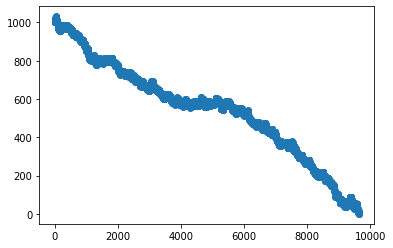

In [10]:
plt.scatter(X, Y)

As you can see as you play the game you are losing money all the time. The reason is the two 0 and 00 that exist at the US roulette table. How about playing the exact same game in Europe. In Europe there is only one green number that you will lose your money the 0. Does this change the outcome?

In [11]:
def rollDice_auto_EU(val):
    if val == "High":
        high_low = 32
    else:
        high_low = 1

    if high_low >= 1 and high_low <= 18 :
        roll = random.randint(0,36)
        if roll == 0 or not roll <=18:
            return False
        else:
            return True
    else:
        roll = random.randint(0,36)
        if roll == 0 or roll <= 18:
            return False
        else:
            return True
        
def simple_bettor_auto_EU(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto_EU(pick):
            value += wager
        else:
            value -= wager
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
#    if value <= 0:
#        print('Funds: Broke')
#        return X, Y
#    else:
#        print("Funds: ", value)
    return X, Y



In [12]:
X_EU, Y_EU = simple_bettor_auto_EU(1000,2,10000,'High')

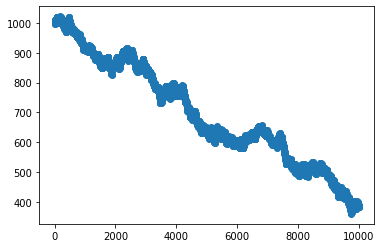

In [13]:
plt.scatter(X_EU, Y_EU)

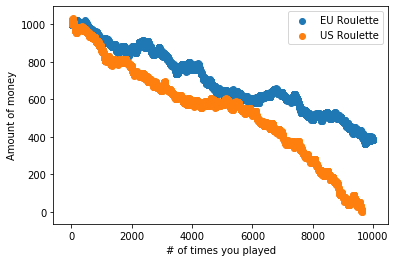

In [14]:
plt.scatter(X_EU, Y_EU, label="EU Roulette")
plt.scatter(X, Y, label="US Roulette")
plt.xlabel("# of times you played")
plt.ylabel("Amount of money")
plt.legend()

Can we find a better strategy than this one? Maybe doubling up the amount of money after each losing bet? 
And going back to our initial bet when we win.

In [77]:
def doubling_auto(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto(pick):
            value += wager
            wager = initial_wager
        else:
            value -= wager
            wager = wager * 2
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
    if value <= 0:
        value = 0
        print("Broke after", currentWager, "plays")
        return X, Y
    print("Still not broke?? amazing!!!")
    return X, Y



In [79]:
X_double, Y_double = doubling_auto(1000, 1, 10000, "High")

Broke after 818 plays


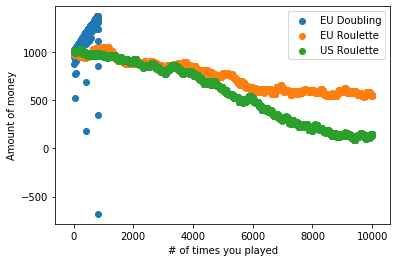

In [81]:
plt.scatter(X_double, Y_double, label="EU Doubling")
plt.scatter(X_EU, Y_EU, label="EU Roulette")
plt.scatter(X, Y, label="US Roulette")
plt.xlabel("# of times you played")
plt.ylabel("Amount of money")
plt.legend()

It seems that by doubling initially you are gaining some money but then it will come a point at which you will run broke very fast. In less than 10000 tries.

In [135]:
def doubling_auto(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto(pick):
            value += wager
            wager = initial_wager
        else:
            value -= wager
            wager = wager * 2
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
    if value <= 0:
        #print("Broke after", currentWager, "plays")
        return value
    #print("Still not broke?? amazing!!!")
    return value

But what is happening if you go at the casino multiple times. Are you gone be able to win at the long run or not?
In the example below one player is visiting the casino 1000 times and he is using doubling strategy. He is gonna play only 100 times per visit.

In [144]:
choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
X_stat_US = []
Y_stat_US = []
if choise == "A":
    x = 0
    totalsum = 0
    while x < 1000:
        if strategy == "A":
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
        else:
            totalsum += simple_bettor_auto(initial_funds, bet, times, high_or_low)-initial_funds
        x = x + 1
        X_stat_US.append(x)
        Y_stat_US.append(totalsum)
    print(times, totalsum)


 Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?
For automatic give auto else give manual:
A -- Automatic,
M -- ManualA
Initial Funds:1000
How much money are you going to bet per turn??
1
How many times do you want to roll the Dice??
100
High or Low in case of automatic only:
High
What strategy are you going to follow?
 Aggresive or single?
A -- Aggresive,
 s -- SingleA
100 -17942


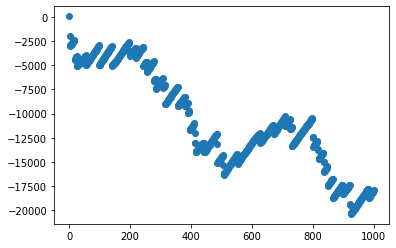

In [145]:
plt.scatter(X_stat_US, Y_stat_US)

In [180]:
def doubling_auto(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto_EU(pick):
            value += wager
            wager = initial_wager
        else:
            value -= wager
            wager = wager * 2
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
    if value <= 0:
        #print("Broke after", currentWager, "plays")
        return value
    #print("Still not broke?? amazing!!!")
    return value


choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
X_stat_EU = []
Y_stat_EU = []
if choise == "A":
    x = 0
    totalsum = 0
    while x < 1000:
        if strategy == "A":
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
        else:
            totalsum += simple_bettor_auto(initial_funds, bet, times, high_or_low)-initial_funds
        x = x + 1
        X_stat_EU.append(x)
        Y_stat_EU.append(totalsum)
    print(times, totalsum)

 Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?
For automatic give auto else give manual:
A -- Automatic,
M -- ManualA
Initial Funds:1000
How much money are you going to bet per turn??
1
How many times do you want to roll the Dice??
100
High or Low in case of automatic only:
High
What strategy are you going to follow?
 Aggresive or single?
A -- Aggresive,
 s -- SingleA
100 -11818


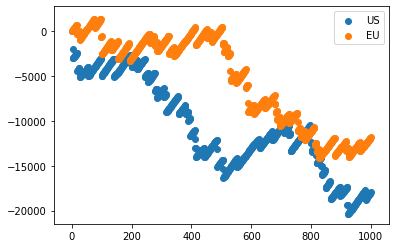

In [181]:
plt.scatter(X_stat_US, Y_stat_US, label="US")
plt.scatter(X_stat_EU, Y_stat_EU, label="EU")
plt.legend()

What about if we try to play a specific number of times every day we are going at the casino? are we gonna have any luck in the long run? Lets try 10000 visits at the casino and see the results.

In [193]:
choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
#times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
X_stat_EU = []
Y_stat_EU = []
if choise == "A":
    for times in range(1, 100):
        x = 0
        totalsum = 0
        while x <= 10000:
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
            x = x + 1
        print(times, totalsum)
        X_stat_EU.append(times)
        Y_stat_EU.append(totalsum)
#        X_stat_EU.append(i)
#        Y_stat_EU.append(totalsum)
    #print(times, totalsum)

 Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?
For automatic give auto else give manual:
A -- Automatic,
M -- ManualA
Initial Funds:1000
How much money are you going to bet per turn??
1
High or Low in case of automatic only:
High
What strategy are you going to follow?
 Aggresive or single?
A -- Aggresive,
 s -- SingleA
1 -247
2 -617
3 -1257
4 -1715
5 -1832
6 -2817
7 -3955
8 -5735
9 -5510
10 -15697
11 -6490
12 -11414
13 -7970
14 -20899
15 -26174
16 -15631
17 -14326
18 -13202
19 -17530
20 -28402
21 -34586
22 -11276
23 -18682
24 -28788
25 -23642
26 -17760
27 -18705
28 -37872
29 -35635
30 -46294
31 -50132
32 -37975
33 -28504
34 -25222
35 -51037
36 -56372
37 -34720
38 -47881
39 -58586
40 -85518
41 -46775
42 -51853
43 -70979
44 -80107
45 -61244
46 -82141
47 -90998
48 -68882
49 -127132
50 -54817
51 -109161
52 -51607
53 -48305
54 -74980
55 -87014
56 -99056
57 -75610
58 -91374
59 -93958
60 -92460
61 -82468
62 -77707
63 -

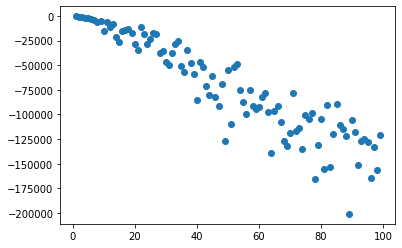

In [194]:
plt.scatter(X_stat_EU, Y_stat_EU)

If we go 10000 times at a Casino we are going to lose some money no matter how many times we are going to play the roulette. Let's try to see if by going to the casino only 100 times change the outcome.

In [202]:
choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
#times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
X_stat_EU = []
Y_stat_EU = []
if choise == "A":
    for times in range(1, 100):
        x = 0
        totalsum = 0
        while x <= 100:
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
            x = x + 1
        print(times, totalsum)
        X_stat_EU.append(times)
        Y_stat_EU.append(totalsum)
#        X_stat_EU.append(i)
#        Y_stat_EU.append(totalsum)
    #print(times, totalsum)

 Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?
For automatic give auto else give manual:
A -- Automatic,
M -- ManualA
Initial Funds:1000
How much money are you going to bet per turn??
1
High or Low in case of automatic only:
High
What strategy are you going to follow?
 Aggresive or single?
A -- Aggresive,
 s -- SingleA
1 -9
2 1
3 -23
4 16
5 -73
6 107
7 -17
8 281
9 161
10 97
11 -180
12 286
13 376
14 330
15 150
16 -131
17 -457
18 537
19 686
20 658
21 523
22 235
23 -510
24 -1160
25 320
26 -1141
27 -1462
28 695
29 -3
30 596
31 160
32 -268
33 -1338
34 -1783
35 -623
36 -561
37 1561
38 -1547
39 -2509
40 544
41 -2592
42 -1699
43 -3684
44 -521
45 -2130
46 1739
47 1032
48 -1084
49 -4229
50 -2423
51 -4251
52 -108
53 -934
54 -1936
55 -1828
56 307
57 1460
58 446
59 -3130
60 -2461
61 457
62 -2705
63 -5471
64 -2451
65 -5366
66 -930
67 -278
68 928
69 1456
70 -2987
71 -3990
72 -1921
73 -1790
74 1350
75 -3807
76 -1743
77 2199
78 

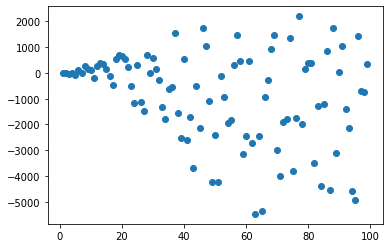

In [203]:
plt.scatter(X_stat_EU, Y_stat_EU)

It seems that by going at the Casino fewer times there is a better possibility to win some money. 
For example if you go 100 times and you play each time 77 turns then there would be a profit of 2199.
But is this a statistical error? In order to find out we will run the same code for 300 times and see what results we are getting.

In [ ]:
choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
#times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")
from collections import defaultdict

results = defaultdict(list)

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
stat_EU = {}
for i in range(300):
    for times in range(1, 100):
        x = 0
        totalsum = 0
        while x <= 100:
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
            x = x + 1
        print(times, totalsum)
        results[times].append(totalsum)
#        X_stat_EU.append(i)
#        Y_stat_EU.append(totalsum)
    #print(times, totalsum)

{1: -3.52, 2: -7.316666666666666, 3: -14.04, 4: -14.283333333333333, 5: -26.3, 6: -43.126666666666665, 7: -68.49333333333334, 8: -51.68666666666667, 9: -55.00333333333333, 10: -102.62666666666667, 11: -113.26, 12: -180.35333333333332, 13: -176.38666666666666, 14: -108.56, 15: -147.43, 16: -180.77666666666667, 17: -228.85, 18: -125.54333333333334, 19: -209.26333333333332, 20: -244.41666666666666, 21: -352.16, 22: -219.19333333333333, 23: -283.1433333333333, 24: -322.5966666666667, 25: -324.2266666666667, 26: -478.86333333333334, 27: -410.71666666666664, 28: -328.7033333333333, 29: -382.7733333333333, 30: -493.8066666666667, 31: -556.0666666666667, 32: -357.25666666666666, 33: -457, 34: -416.4533333333333, 35: -416.12666666666667, 36: -612.0733333333334, 37: -374.43, 38: -507.76666666666665, 39: -569.6966666666667, 40: -607.13, 41: -626.9566666666667, 42: -596.9333333333333, 43: -526.1133333333333, 44: -681.5733333333334, 45: -479.97333333333336, 46: -727.3933333333333, 47: -740.93, 48: 

Text(0, 0.5, 'Amount of money')

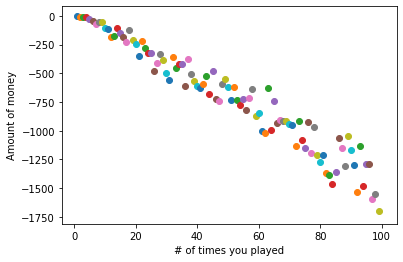

In [226]:
from statistics import mean
results_average = {}
for key in results.keys():
    results_average[key] = mean(results[key])
    plt.scatter(key, results_average[key])
print(results_average)
plt.xlabel("# of times you played")
plt.ylabel("Amount of money")

As it can be seen even if you go fewer times at the casino you are going to end up losing time in the long run if you choose to play High-Low or Red-Black. In fact there is no way of winning at the Casino because the green zero exists. It is even worst in the US Casino because over there you have two greens that will make you lose money. 